In [1]:
cd ..

d:\research\fedmiss_bench


In [2]:
import os
import itertools
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Evaluation Results

In [3]:
nnn_imp_fed = {
    'simple': ['local', 'fedavg', 'central'],
    'em': ['local', 'fedavg', 'central'],
    'linear_ice': ['local', 'fedavg', 'central'],
    'missforest': ['local', 'fedtree', 'central']
}

nn_imp_fed = {
    'miwae': ['local', 'fedavg', 'fedavg_ft', 'fedprox', 'central'],
    'gain': ['local', 'fedavg', 'fedavg_ft', 'fedprox', 'central'],
}

dataset_dp = {
    'codrna': ['iid-even', 'iid-uneven', 'niid-f1', 'niid-f2'],
    'california': ['iid-even', 'iid-uneven', 'niid-t1', 'niid-t2'],
    'hhip': ['iid-even', 'iid-uneven', 'niid-t1', 'niid-t2'],
    'dvisits': ['iid-even', 'iid-uneven', 'niid-t1', 'niid-t2'],
    'vehicle': ['iid-even', 'iid-uneven', 'niid-f1', 'niid-f2'],
    'school_pca': ['iid-even', 'iid-uneven', 'niid-f1', 'niid-f2'],
}

dataset_metric_pred = {
    'codrna': ['accuracy', 'f1', 'auc', 'prc'],
    'california': ['mse', 'mae', 'r2'],
    'hhip': ['mse', 'mae', 'r2'],
    'dvisits': ['mse', 'mae', 'r2'],
    'vehicle': ['mse', 'mae', 'r2'],
    'school_pca': ['mse', 'mae', 'r2'],
}

In [8]:
def load_ret(datasets, imputers, met):
    
    rets = []
    for dataset in datasets:
        
        data_partition = dataset_dp[dataset]
        missing = ['mcar', 'mar-homog', 'mnar1-homog', 'mnar2-homog', 'mar-heter', 'mnar1-heter', 'mnar2-heter']
        models = ['linear', 'nn']
        
        for imputer in imputers:
            
            print(dataset, imputer)            
            if imputer in nnn_imp_fed:
                rounds = [0,1,2,3,4,5,6,7,8,9]
                feds = nnn_imp_fed[imputer]
            else:
                rounds = [0,1,2,3,4]
                feds = nn_imp_fed[imputer]

            param = itertools.product(feds, data_partition, missing, rounds, models)
            dir_path = f'./results/raw_results/eval_results/alpha/{dataset}/'

            unfinished = set()
            count = 0
            for i, (fed, dp, ms, round, model) in enumerate(param):
                
                file_path = f'{dir_path}{dp}_{ms}/{imputer}/{fed}/{round}/{model}/eval_results.json'
            
                try:
                    with open(file_path, 'r') as f:
                        ret = json.load(f)
                        if met == 'imp':
                            metrics = ['rmse', 'sliced-ws']
                            ret_metrics = [ret['results']['imp_quality'][metric] for metric in metrics]
                        elif met == 'pred':
                            metrics = dataset_metric_pred[dataset]
                            ret_metrics = [ret['results']['pred_performance'][metric] for metric in metrics]
                        else:
                            raise ValueError('Invalid metric')
                        
                        for id, items in enumerate(zip(*ret_metrics)):
                            setting = {
                                'dataset': dataset,
                                'data_partition': dp,
                                'imputer': imputer,
                                'fed': fed,
                                'missing': ms,
                                'round': round,
                                'model': model,
                                'client_id': id
                            }
                            setting.update({metric: item for metric, item in zip(metrics, items)})
                            rets.append(setting)
                
                except Exception as e:
                    #print(file_path)
                    count += 1
                    unfinished.add((dp, ms, imputer, fed))
                    continue

            print(count)
        
    return rets, unfinished

In [9]:
result_pred, unfinished = load_ret(
    ['codrna', 'california', 'dvisits', 'hhip', 'vehicle', 'school_pca'], ['simple', 'em', 'linear_ice', 'missforest', 'miwae', 'gain'], met = 'pred'
)

codrna simple
0
codrna em
0
codrna linear_ice
0
codrna missforest
0
codrna miwae
0
codrna gain
16
california simple
0
california em
0
california linear_ice
840
california missforest
0
california miwae
0
california gain
0
dvisits simple
0
dvisits em
0
dvisits linear_ice
0
dvisits missforest
0
dvisits miwae
0
dvisits gain
0
hhip simple
1680
hhip em
1680
hhip linear_ice
1680
hhip missforest
1680
hhip miwae
1400
hhip gain
1400
vehicle simple
1680
vehicle em
1680
vehicle linear_ice
1680
vehicle missforest
1680
vehicle miwae
1400
vehicle gain
1400
school_pca simple
0
school_pca em
0
school_pca linear_ice
1680
school_pca missforest
128
school_pca miwae
86
school_pca gain
64


In [6]:
result_imp, unfinished = load_ret(
    ['codrna', 'california', 'dvisits'], ['simple', 'em', 'linear_ice', 'miwae', 'gain'], met = 'imp'
)

0
0
0
0
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar1-homog/gain/local/4/linear/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar1-homog/gain/local/4/nn/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar2-homog/gain/local/4/linear/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar2-homog/gain/local/4/nn/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar1-homog/gain/fedavg/4/linear/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar1-homog/gain/fedavg/4/nn/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar2-homog/gain/fedavg/4/linear/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar2-homog/gain/fedavg/4/nn/eval_results.json
./results/raw_results/eval_results/alpha/codrna/iid-uneven_mnar1-homog/gain/fedavg_ft/4/linear/eval_results.json
./results/raw_resul

## Improvements Imputation Qaulity

In [93]:
def calculate_improvement(df):
    columns={item: f'{item}_local' for item in ['rmse', 'sliced-ws']}
    df = df.copy()
    local_baseline = df[df['fed'] == 'local'].copy()
    local_baseline.rename(columns=columns, inplace=True)
    keys = ['dataset', 'data_partition', 'missing', 'imputer', 'client_id', 'round']
    df = df.merge(local_baseline[keys + list(columns.values())], on=keys, how='left')
    
    for item in ['rmse', 'sliced-ws']:
        df[f'{item}_diff'] = - (df[item] - df[f'{item}_local'])
        df[f'{item}_improv'] = (df[f'{item}_diff'] / df[f'{item}_local']) * 100
    
    df = df[df['fed'] != 'local']
    #final_df = df[['dataset', 'partition', 'missing', 'imp', 'fed', 'client_id', 'round_id', 'rmse_diff', 'rmse_improv', 'ws_diff', 'ws_improv']]
    
    return df

In [94]:
df_imp = pd.DataFrame(result_imp)
df_imp = df_imp[df_imp['model'] == 'nn']
df_imp = df_imp.drop(columns=['model'])
df_imp.replace({'niid-f1': 'niid1', 'niid-f2': 'niid2', 'niid-t1': 'niid1', 'niid-t2': 'niid2'}, inplace=True)
df_imp_improv = calculate_improvement(df_imp)

In [95]:
df_imp_improv

,dataset,data_partition,imputer,fed,missing,round,client_id,rmse,sliced-ws,rmse_local,sliced-ws_local,rmse_diff,rmse_improv,sliced-ws_diff,sliced-ws_improv
2800,codrna,iid-even,simple,fedavg,mcar,0,0,0.170212,0.065395,0.170213,0.065619,0.000001,0.000836,0.000224,0.341717
2801,codrna,iid-even,simple,fedavg,mcar,0,1,0.167596,0.053692,0.167724,0.053620,0.000128,0.076408,-0.000071,-0.133103
2802,codrna,iid-even,simple,fedavg,mcar,0,2,0.162470,0.046317,0.162599,0.046534,0.000129,0.079137,0.000217,0.466051
2803,codrna,iid-even,simple,fedavg,mcar,0,3,0.171851,0.064649,0.171930,0.064570,0.000079,0.046007,-0.000079,-0.122256
2804,codrna,iid-even,simple,fedavg,mcar,0,4,0.169587,0.051928,0.169623,0.052067,0.000036,0.021244,0.000140,0.268447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117515,dvisits,niid2,gain,central,mnar2-heter,4,5,0.248941,0.084982,0.254794,0.086217,0.005854,2.297430,0.001235,1.432956
117516,dvisits,niid2,gain,central,mnar2-heter,4,6,0.235761,0.083987,0.254566,0.089960,0.018805,7.387152,0.005973,6.639876
117517,dvisits,niid2,gain,central,mnar2-heter,4,7,0.253323,0.073955,0.286122,0.086027,0.032799,11.463313,0.012073,14.033674
117518,dvisits,niid2,gain,central,mnar2-heter,4,8,0.236677,0.069503,0.312930,0.101988,0.076253,24.367514,0.032484,31.851441


In [96]:
def agg_client_improv(df, method = 'mean', metric = 'improv'):
    df['fed'] = df['fed'].astype(str)
    df_agg = df.groupby(['dataset', 'data_partition', 'missing', 'imputer', 'fed', 'client_id'], observed = False).agg(
        {f'rmse_{metric}': method, f'sliced-ws_{metric}': method}).reset_index()
    return df_agg

In [114]:
def bar_plot_new(df_improv, metric, method, scenarios, partitions, datasets, fed = 'fedavg'):
    
    
    fig, axes = plt.subplots(
        len(datasets), len(scenarios), figsize=(18, 2.5*len(datasets)), squeeze=False, sharey=True, sharex=True
    )

    # for each scenario draw a bar plot, bar represents the rmse of fedavg - rmse of local
    for j, dataset in enumerate(datasets):
        
        df_nnn_improv_agg = agg_client_improv(df_improv, method = 'mean', metric = metric.split('_')[-1])
        df_nnn_dataset = df_nnn_improv_agg[df_nnn_improv_agg['dataset'] == dataset].copy()
        df_nnn_dataset['imputer'] = pd.Categorical(df_nnn_dataset['imputer'], categories=method, ordered=True)
        
        for i, scenario in enumerate(scenarios):
                
            filtered_df = df_nnn_dataset[
                (df_nnn_dataset['missing'] == scenario) & (df_nnn_dataset['data_partition'].isin(partitions)) & (
                    df_nnn_dataset['fed'] == fed)
            ]
    
            axes[j, i] = sns.barplot(
                x='data_partition', y=metric, hue='imputer', data=filtered_df, ax=axes[j, i], legend=False, errorbar=None
            )
            
            axes[j, i].set_ylabel('')
            
    #         #axes[j, i].axhline(y=0, color='r', linestyle='--')
            
    #         if i == 0:
    #             axes[j, i].set_ylabel(f'Difference {metric}')
    #         #axes[0, i].set_title(scenario)
    #         if j == len(datasets) - 1:
    #             for item in axes[j, i].get_xticklabels():
    #                 item.set_rotation(45)
            
    #         axes[j, i].get_legend().remove()
    #         axes[0, i].set_title(scenario)

    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Imputation Method')
    plt.subplots_adjust(wspace=0.0)
    # #fig.suptitle(f'{dataset.upper()} - {fed.upper()} relative to LOCAL - {metric.split("_")[0].upper()}', x=0.5, y=1.1, fontsize=12)
    # plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


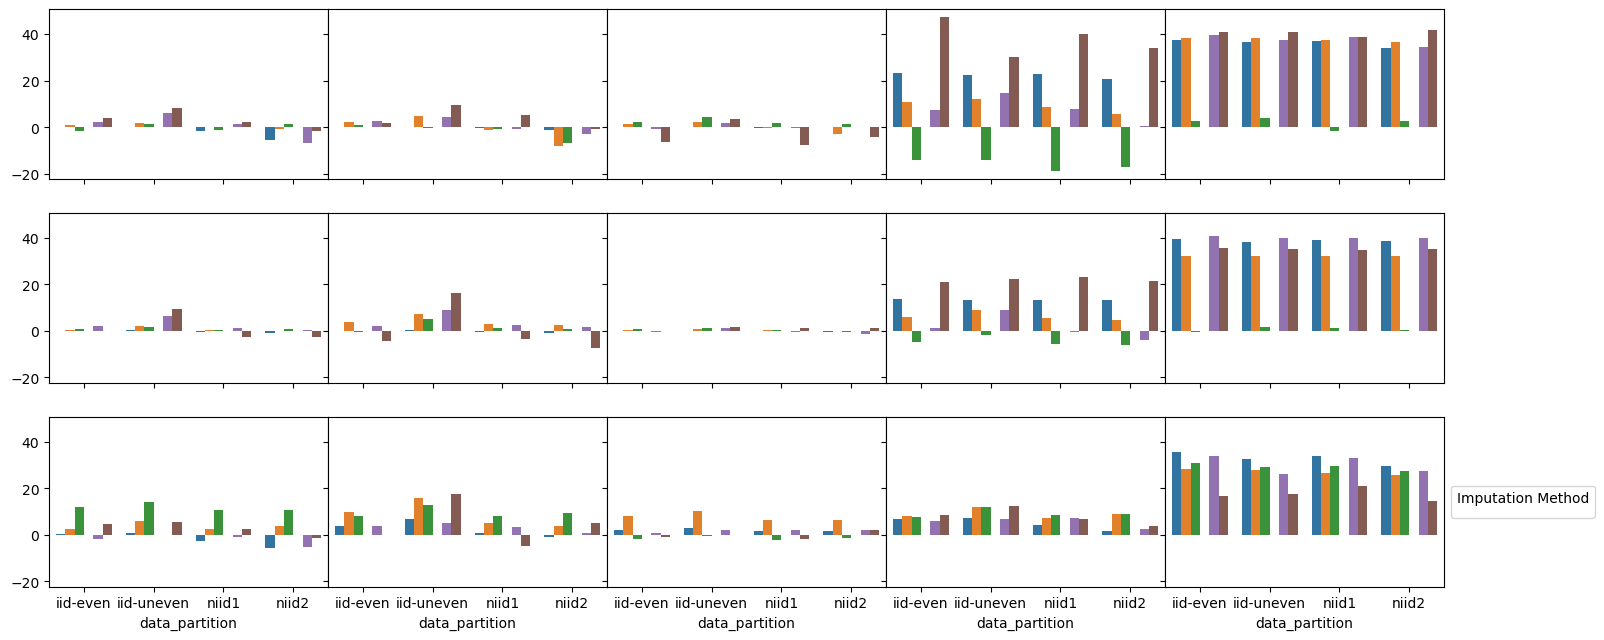

In [115]:
method = ['simple', 'em', 'linear_ice', 'missforest', 'miwae', 'gain']
scenarios = ['mcar', 'mar-homog', 'mnar2-homog', 'mar-heter', 'mnar2-heter']
partitions = ['iid-even', 'iid-uneven', 'niid1', 'niid2']
bar_plot_new(df_imp_improv, 'rmse_improv', method, scenarios, partitions, ['codrna', 'california', 'dvisits'])

## Improvements Downstream Performance

In [102]:
def calculate_improvement(df, dataset_name):
    columns={item: f'{item}_local' for item in dataset_metric_pred[dataset_name]}
    df = df.copy()
    local_baseline = df[df['fed'] == 'local'].copy()
    local_baseline.rename(columns=columns, inplace=True)
    keys = ['dataset', 'data_partition', 'missing', 'imputer', 'client_id', 'round']
    df = df.merge(local_baseline[keys + list(columns.values())], on=keys, how='left')
    
    for item in dataset_metric_pred[dataset_name]:
        df[f'{item}_diff'] = df[item] - df[f'{item}_local']
        df[f'{item}_improv'] = (df[f'{item}_diff'] / df[f'{item}_local']) * 100
    
    df = df[df['fed'] != 'local']
    #final_df = df[['dataset', 'partition', 'missing', 'imp', 'fed', 'client_id', 'round_id', 'rmse_diff', 'rmse_improv', 'ws_diff', 'ws_improv']]
    
    return df

In [104]:
df_pred = pd.DataFrame(result_pred)
df_pred = df_pred[df_pred['model'] != 'nn']
df_pred = df_pred.drop(columns=['model'])
df_pred_improv = calculate_improvement(df_pred, 'codrna')
df_pred_improv

,dataset,data_partition,imputer,fed,missing,round,client_id,accuracy,f1,auc,...,auc_local,prc_local,accuracy_diff,accuracy_improv,f1_diff,f1_improv,auc_diff,auc_improv,prc_diff,prc_improv
2800,codrna,iid-even,simple,fedavg,mcar,0,0,0.922222,0.892308,0.978611,...,0.979167,0.951023,0.005556,0.606061,0.006812,0.769231,-0.000556,-0.056738,0.001894,0.199107
2801,codrna,iid-even,simple,fedavg,mcar,0,1,0.894444,0.854962,0.959028,...,0.955556,0.906473,0.005556,0.625000,0.008808,1.040944,0.003472,0.363372,0.005825,0.642581
2802,codrna,iid-even,simple,fedavg,mcar,0,2,0.894444,0.861314,0.981389,...,0.981250,0.966664,0.005556,0.625000,0.006241,0.729927,0.000139,0.014154,0.000378,0.039142
2803,codrna,iid-even,simple,fedavg,mcar,0,3,0.794444,0.741259,0.921389,...,0.920833,0.868993,0.011111,1.418440,0.010224,1.398601,0.000556,0.060332,0.001508,0.173504
2804,codrna,iid-even,simple,fedavg,mcar,0,4,0.900000,0.863636,0.973194,...,0.973194,0.948997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92315,dvisits,niid-t2,gain,central,mnar2-heter,4,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92316,dvisits,niid-t2,gain,central,mnar2-heter,4,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92317,dvisits,niid-t2,gain,central,mnar2-heter,4,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92318,dvisits,niid-t2,gain,central,mnar2-heter,4,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Imputers Comparison Imputation Quality

In [63]:
df_imp = pd.DataFrame(result_imp)
df_imp

,dataset,data_partition,imputer,fed,missing,round,model,client_id,rmse,sliced-ws
0,codrna,iid-even,simple,local,mcar,0,linear,0,0.170213,0.065619
1,codrna,iid-even,simple,local,mcar,0,linear,1,0.167724,0.053620
2,codrna,iid-even,simple,local,mcar,0,linear,2,0.162599,0.046534
3,codrna,iid-even,simple,local,mcar,0,linear,3,0.171930,0.064570
4,codrna,iid-even,simple,local,mcar,0,linear,4,0.169623,0.052067
...,...,...,...,...,...,...,...,...,...,...
78235,codrna,niid-f2,gain,central,mnar2-heter,4,nn,5,0.143059,0.076276
78236,codrna,niid-f2,gain,central,mnar2-heter,4,nn,6,0.197525,0.118690
78237,codrna,niid-f2,gain,central,mnar2-heter,4,nn,7,0.164777,0.066542
78238,codrna,niid-f2,gain,central,mnar2-heter,4,nn,8,0.205193,0.106524


## Imputers Comparison Downstream Performance

In [64]:
df_pred = pd.DataFrame(result_pred)
df_pred

,dataset,data_partition,imputer,fed,missing,round,model,client_id,accuracy,f1,auc,prc
0,codrna,iid-even,simple,local,mcar,0,linear,0,0.916667,0.885496,0.979167,0.951023
1,codrna,iid-even,simple,local,mcar,0,linear,1,0.888889,0.846154,0.955556,0.906473
2,codrna,iid-even,simple,local,mcar,0,linear,2,0.888889,0.855072,0.981250,0.966664
3,codrna,iid-even,simple,local,mcar,0,linear,3,0.783333,0.731034,0.920833,0.868993
4,codrna,iid-even,simple,local,mcar,0,linear,4,0.900000,0.863636,0.973194,0.948997
...,...,...,...,...,...,...,...,...,...,...,...,...
78235,codrna,niid-f2,gain,central,mnar2-heter,4,nn,5,0.813636,0.775956,0.891047,0.761242
78236,codrna,niid-f2,gain,central,mnar2-heter,4,nn,6,0.695652,0.395062,0.706635,0.260740
78237,codrna,niid-f2,gain,central,mnar2-heter,4,nn,7,0.861538,0.590909,0.916952,0.675064
78238,codrna,niid-f2,gain,central,mnar2-heter,4,nn,8,0.696629,0.330579,0.880932,0.792757
